## Attacks Against MobileNet Using FoolBox

In [0]:
!pip install foolbox

In [0]:
#Import dependencies 
import foolbox as fb 
import torchvision.models as models
import eagerpy as ep 
import numpy as np
from foolbox import PyTorchModel, accuracy, samples
import foolbox.attacks as fba

In [0]:
# Download MobileNet pretrained on ImageNet
mobilenet = models.mobilenet_v2(pretrained=True)
model = mobilenet.eval()

In [0]:
# A preprocessing method utilized in previous literature was chosen
preprocessing = dict(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], axis=-3) 

# Defines interface for model
fmodel = PyTorchModel(model, bounds=(0, 1), preprocessing=preprocessing) 

# Interesting note: PyTorchModel inherits ModelWithPreprocessing for multi-platform use
# PyTorchModel definition: https://bit.ly/2LoAanD

In [0]:
# A random sample of images are chosen for the attack
images, labels = ep.astensors(*samples(fmodel, dataset="imagenet", batchsize=16))

In [0]:
# Implements FGSM- Fast Gradient Sign Method (White Box)
attack = fba.FGSM()

# Test 8 different epsilon values =
epsilons = [0.0, 0.001, 0.01, 0.03, 0.1, 0.3, 0.5, 1.0]

# Generate raw images, clipped images, and truth values for images
raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=epsilons)

In [0]:
# Note length of the list is = num of epsilon values 
len(raw)

8

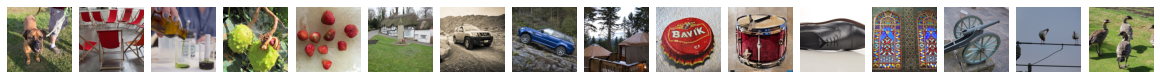

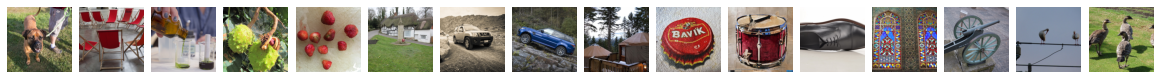

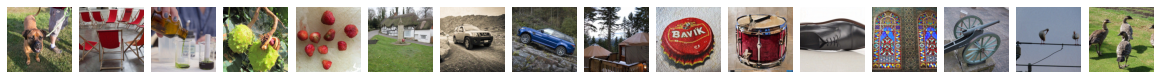

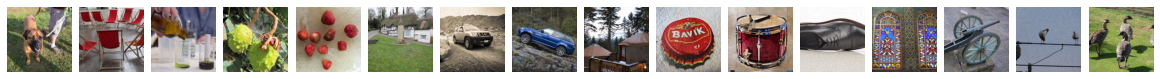

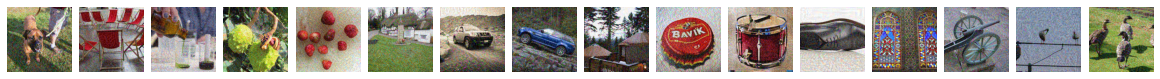

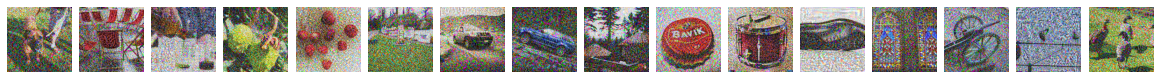

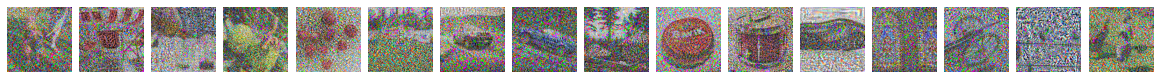

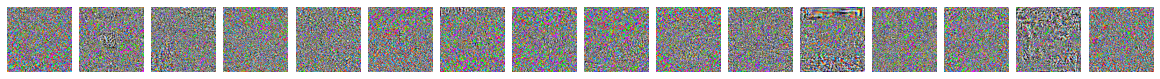

In [0]:
# Display adversarially perturbated images 
for image in raw:
    fb.plot.images(image)

In [0]:
# Implement the black box boundary attack
# Note this will take longer than the previous attack
attack = fba.BoundaryAttack()
#epsilons = [0.0, 0.001, 0.01, 0.03, 0.1]
raw, clipped, is_adv = c(fmodel, images, labels, epsilons=0.03)

In [0]:
# Show successes and failures of attack
is_adv

PyTorchTensor(tensor([False, False, False, False, False, False, False,  True, False, False,
                      False, False, False, False,  True, False], device='cuda:0'))

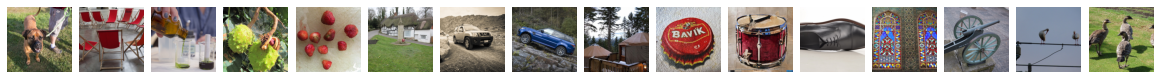

In [0]:
# Display raw images
fb.plot.images(raw)

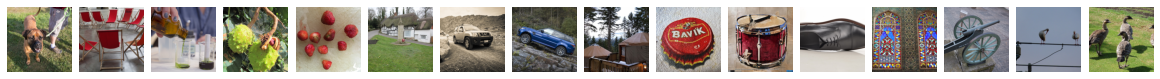

In [0]:
# Display clipped images
fb.plot.images(clipped)